In [21]:
#Importing the necessary library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Importing the dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images , training_labels) , (testing_images , testing_labels) = fmnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

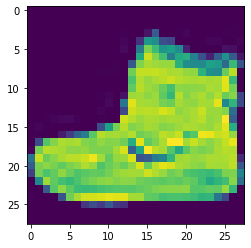

In [23]:
#Printing and checking
plt.imshow(training_images[0])

print(training_images[0])
print(training_labels[0])

In [24]:
#Normalising the images
training_images = training_images / 255.0
testing_images = testing_images / 255.0
training_images.shape

(60000, 28, 28)

In [28]:
#Desgning the model
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=training_images[0].shape),
                                    tf.keras.layers.LSTM(128),
                                    tf.keras.layers.Dense(10 , activation=tf.nn.softmax)])

In [29]:
#Training the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(training_images , training_labels, validation_data=(testing_images,testing_labels) , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5794 - accuracy: 0.7843 - val_loss: 0.4511 - val_accuracy: 0.8362
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4023 - accuracy: 0.8504 - val_loss: 0.4227 - val_accuracy: 0.8426
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3541 - accuracy: 0.8676 - val_loss: 0.3677 - val_accuracy: 0.8623
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3252 - accuracy: 0.8794 - val_loss: 0.3420 - val_accuracy: 0.8745
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3033 - accuracy: 0.8862 - val_loss: 0.3316 - val_accuracy: 0.8761


In [30]:
#Evaluating the model
model.evaluate(testing_images , testing_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.3316 - accuracy: 0.8761


[0.33155518770217896, 0.8761000037193298]

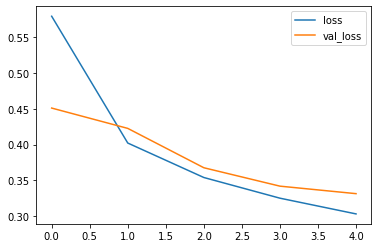

In [31]:
#Plotting Loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

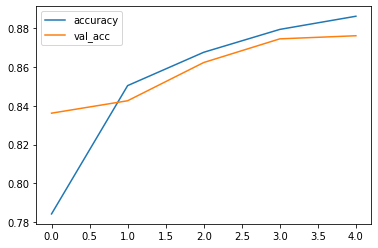

In [32]:
#Plotting accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()